Import the relevant python modules required for the example: xarray and matplotlib

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from SubRoutines.indexing import find_matching_index
from SubRoutines.plotting import pannel_plot

In [2]:
esacci_lst_025 = "Data/ESACCI-LST-L3C-LST-MODISA-0.25deg_1MONTHLY_DAY-20060701000000-fv3.00.nc"
ds = xr.load_dataset(esacci_lst_025)

In [3]:
ds

<xarray.Dataset>
Dimensions:          (time: 1, lat: 720, lon: 1440, length_scale: 1, channel: 2)
Coordinates:
  * time             (time) datetime64[ns] 2006-07-01
  * lat              (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon              (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * channel          (channel) float32 11.0 12.0
Dimensions without coordinates: length_scale
Data variables:
    dtime            (time, lat, lon) timedelta64[ns] NaT NaT NaT ... NaT NaT
    satze            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    sataz            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    solze            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    solaz            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst              (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_uncertainty  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_ran      (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_loc_atm  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_loc_sfc  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_sys      (length_scale, lat, lon) float32 nan nan nan ... nan nan
Attributes: (12/41)
    title:                      ESA LST CCI land surface temperature data at ...
    institution:                University of Leicester
    source:                     ESA LST CCI MODISA L3C V3.00
    history:                    Created using software developed at Universit...
    references:                 https://climate.esa.int/en/projects/land-surf...
    tracking_id:                4d86dd7-ffa4-4c6a-8dca-21c2ba45f8d2
    ...                         ...
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    geospatial_lat_resolution:  0.25
    key_variables:              land_surface_temperature
    svn_version:                5771
    format_version:             CCI Data Standards v2.2

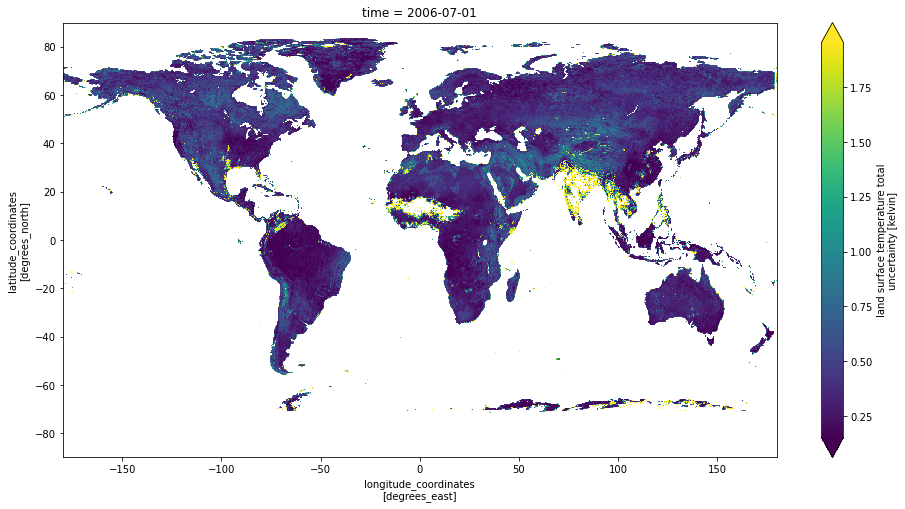

In [4]:
ds.lst_uncertainty.plot(size=8,aspect=2,robust=True)

In [5]:
lower_lon = 105.0
upper_lon = 145.0
lower_lat = 25.0
upper_lat = 65.0
lat_max_idx = find_matching_index(ds.lat.values,upper_lat)
lat_min_idx = find_matching_index(ds.lat.values,lower_lat)
lon_max_idx = find_matching_index(ds.lon.values,upper_lon)
lon_min_idx = find_matching_index(ds.lon.values,lower_lon)
lat_region = slice(lat_min_idx, lat_max_idx)
lon_region = slice(lon_min_idx,lon_max_idx)

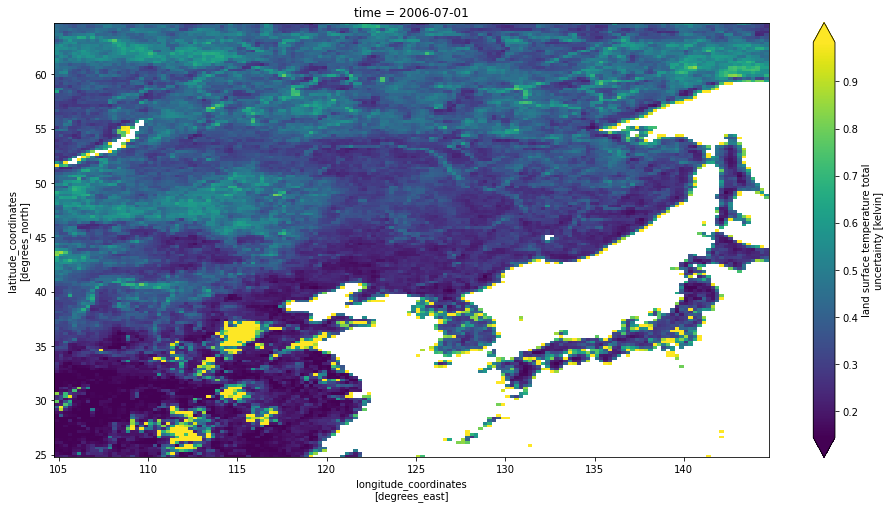

In [8]:
ds.lst_uncertainty.isel(lat=lat_region, lon=lon_region).plot(size=8,aspect=2, robust=True)

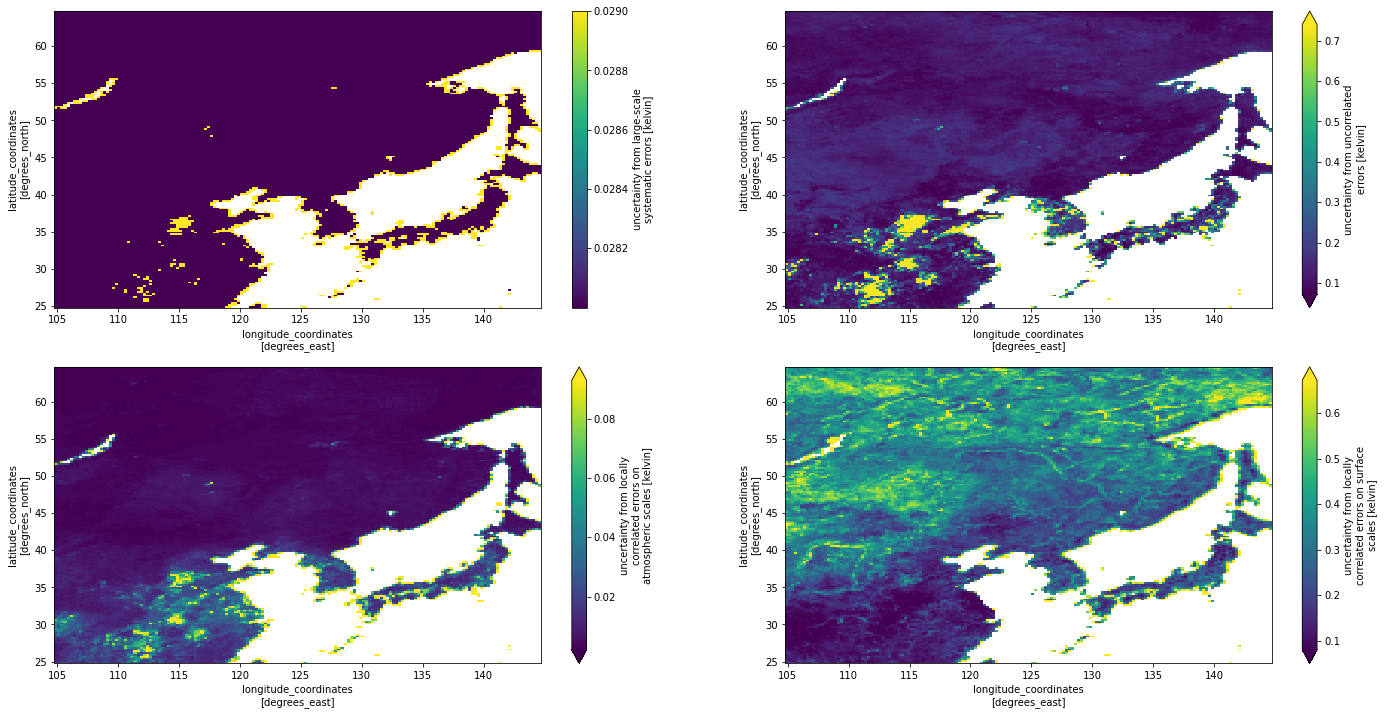

In [6]:

pannel_plot(ds,lat_region,lon_region)

In [44]:
lat_point, lon_point = 35.0, 115.0
lat_idx = find_matching_index(ds.lat.values, lat_point)
lon_idx = find_matching_index(ds.lon.values, lon_point)
point_total_uncertainty = ds.lst_uncertainty.isel(lat=lat_idx,lon=lon_idx).values[0]
ran = ds.lst_unc_ran.isel(lat=lat_idx,lon=lon_idx).values[0]
atm = ds.lst_unc_loc_atm.isel(lat=lat_idx,lon=lon_idx).values[0]
sfc = ds.lst_unc_loc_sfc.isel(lat=lat_idx,lon=lon_idx).values[0]
sys = ds.lst_unc_sys.isel(lat=lat_idx,lon=lon_idx).values[0]

print(f"Total: {point_total_uncertainty}")
print(f"random: {ran}, atmosphere: {atm}, surface: {sfc}, systematic: {sys}")

calculated_total = np.sqrt(round(ran,3)**2 + atm**2 + sfc**2 + sys**2)

print(f"Calculated total: {calculated_total}")

Total: 0.5950000286102295
random: 0.5789999961853027, atmosphere: 0.029000001028180122, surface: 0.12800000607967377, systematic: 0.02800000086426735
Calculated total: 0.5943483803687956
